In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from __future__ import print_function
import numpy as np
from orphics import lensing,io,stats,cosmology,maps

Generating theory Cls...


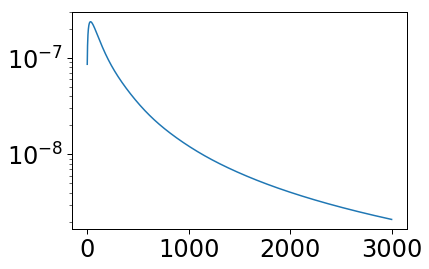

In [3]:
# Initialize cosmology and Clkk. Later parts need dimensionless spectra.
lmax = 3000
cc = cosmology.Cosmology(lmax=lmax,pickling=True,dimensionless=True)
theory = cc.theory
ells = np.arange(2,lmax,1)
clkk = theory.gCl('kk',ells)

pl = io.Plotter(yscale='log')
pl.add(ells,clkk)
pl.done()

In [4]:
# Make a map template for calculating the noise curve on
shape,wcs = maps.rect_geometry(width_deg = 5.,px_res_arcmin=1.5)
# Define bin edges for noise curve
bin_edges = np.arange(80,2100,20)
nlgen = lensing.NlGenerator(shape,wcs,theory,bin_edges,lensedEqualsUnlensed=True)
# Experiment parameters, here for Planck
beam = 1.5
noiseT = 1.
noiseP = 1.4
tellmin = 100
tellmax = 3000
pellmin = 100
pellmax = 3000
kmin = 20
kmax = 3000
polCombs = ['TT','TE','EE','EB','TB']
_,_,_,_ = nlgen.updateNoise(beamX=beam,noiseTX=noiseT,noisePX=noiseP,tellminX=tellmin,tellmaxX=tellmax,pellminX=pellmin,pellmaxX=pellmax)
ls,nls,bells,nlbb,efficiency = nlgen.getNlIterative(polCombs,kmin,kmax,tellmax,pellmin,pellmax,verbose=True,plot=False)


/home/msyriac/repos/orphics/orphics/lensing.py:716: RuntimeWarning: overflow encountered in multiply
  NL = l4 *alval/ 4.


Performing iteration  1
Performing iteration  2


/home/msyriac/repos/orphics/orphics/lensing.py:751: RuntimeWarning: overflow encountered in multiply
  self.Nlppnow = Nlkk*4./(self.modLMap**2.)/((self.modLMap+1.)**2.)


Percentage difference between iterations is  22.41424175  compared to requested tolerance of  1.0 . Diff of Nlkks is  24.6553841608
Performing iteration  3
Percentage difference between iterations is  4.45320052423  compared to requested tolerance of  1.0 . Diff of Nlkks is  4.99566984341
Performing iteration  4
Percentage difference between iterations is  0.854584228456  compared to requested tolerance of  1.0 . Diff of Nlkks is  0.97508805863


/home/msyriac/.local/lib/python2.7/site-packages/numpy/ma/core.py:6592: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


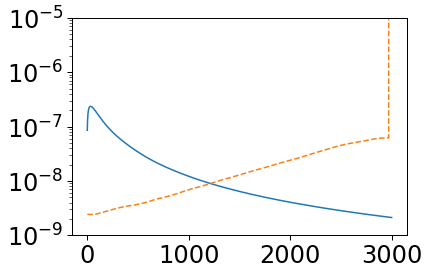

In [5]:
# The result is noise curve nls defined at bin centers ls
pl = io.Plotter(yscale='log')
pl.add(ells,clkk)
pl.add(ls,nls,ls='--')
pl._ax.set_ylim(1.e-9,1.e-5)
pl.done()

[ 0.18601721  0.21555581  0.24157001 ...,  0.          0.          0.        ]


/home/msyriac/repos/orphics/orphics/cosmology.py:999: RuntimeWarning: overflow encountered in multiply
  return np.sum(ells*tot)/np.sum(ells)


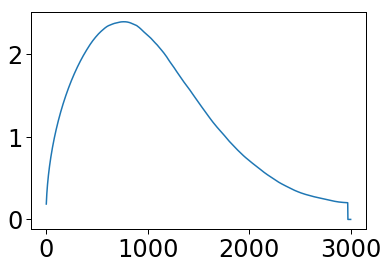

In [6]:
LF = cosmology.LensForecast()
LF.loadKK(ells,clkk,ls,nls)
lmin = 2
lmax = 3000
dell = 1
ellBinEdges = np.arange(lmin,lmax,dell)
lcents = (ellBinEdges[1:]+ellBinEdges[:-1])/2.

var, sigs1, sigs2 = LF.KnoxCov("kk","kk",ellBinEdges,500./41250)
print(np.sqrt(sigs1))        

pl = io.Plotter()
pl.add(lcents,np.sqrt(sigs1))
pl.done()


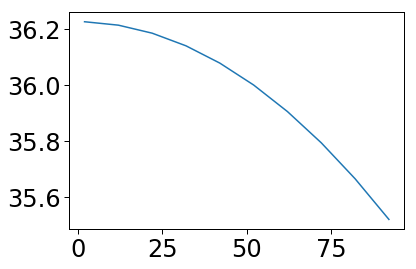

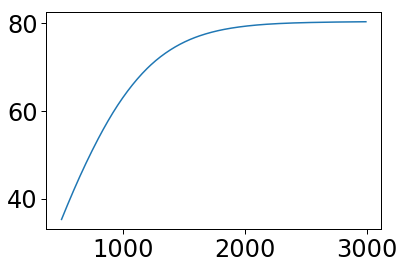

In [8]:
LF = cosmology.LensForecast()
LF.loadKK(ells,clkk,ls,nls)

                  


lminfid = 100
lmaxfid = 500
dell = 10
sns = []
lmins = np.arange(2,lminfid,dell)
for lmin in lmins:
    ellBinEdges = np.arange(lmin,lmaxfid,dell)

    sn,errs = LF.sn(ellBinEdges,500./41250.,"kk")
    sns.append(sn)
    
pl = io.Plotter()
pl.add(lmins,sns)
pl.done()

sns = []
lmaxs = np.arange(lmaxfid,3000,dell)
for lmax in lmaxs:
    ellBinEdges = np.arange(lminfid,lmax,dell)

    sn,errs = LF.sn(ellBinEdges,500./41250.,"kk")
    sns.append(sn)
    
pl = io.Plotter()
pl.add(lmaxs,sns)
pl.done()
